# Sentiment Analysis

In [15]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus.pkl')
data

,transcript,full_name
Barack Obama,"Barack Obama: (00:00)\nHello, Orlando! Barack ...",Barack Obama
Joe Biden,"Joe Biden: (00:24)\nHello, hello, hello. Hello...",Joe Biden
Kamala Harris,Kamala Harris: (00:00)\n… Working two jobs yet...,Kamala Harris
President Donald J. Trump,President Donald J. Trump: (02:08)\nThank you ...,Donald Trump
Vice President Mike Pence,Ben Carson: (00:01)\n… but a great friend of A...,Mike Pence


In [16]:
!pip install TextBlob

In [17]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,full_name,polarity,subjectivity
Barack Obama,"Barack Obama: (00:00)\nHello, Orlando! Barack ...",Barack Obama,0.062648,0.498380
Joe Biden,"Joe Biden: (00:24)\nHello, hello, hello. Hello...",Joe Biden,-0.005022,0.522011
Kamala Harris,Kamala Harris: (00:00)\n… Working two jobs yet...,Kamala Harris,-0.029166,0.550306
President Donald J. Trump,President Donald J. Trump: (02:08)\nThank you ...,Donald Trump,0.059281,0.562337
Vice President Mike Pence,Ben Carson: (00:01)\n… but a great friend of A...,Mike Pence,0.082401,0.463644


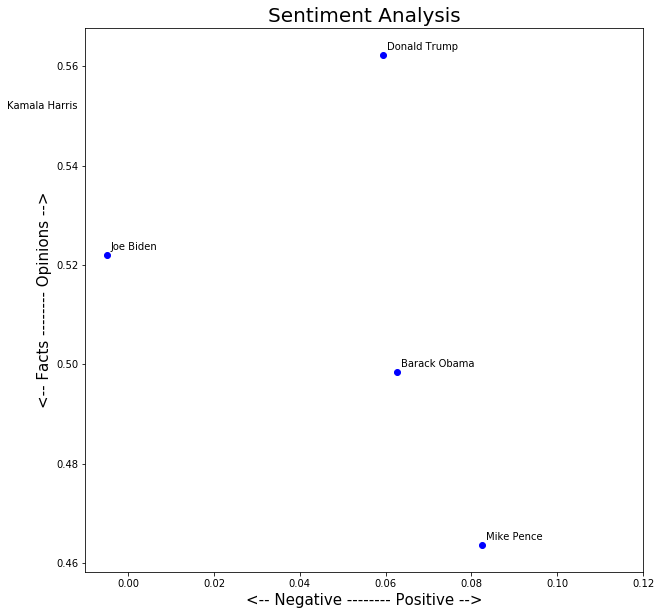

In [18]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 10]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['full_name'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [19]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [20]:
# Let's take a look at our data again
data

,transcript,full_name,polarity,subjectivity
Barack Obama,"Barack Obama: (00:00)\nHello, Orlando! Barack ...",Barack Obama,0.062648,0.498380
Joe Biden,"Joe Biden: (00:24)\nHello, hello, hello. Hello...",Joe Biden,-0.005022,0.522011
Kamala Harris,Kamala Harris: (00:00)\n… Working two jobs yet...,Kamala Harris,-0.029166,0.550306
President Donald J. Trump,President Donald J. Trump: (02:08)\nThank you ...,Donald Trump,0.059281,0.562337
Vice President Mike Pence,Ben Carson: (00:01)\n… but a great friend of A...,Mike Pence,0.082401,0.463644


In [21]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t)
    list_pieces.append(split)
    
list_pieces

[['Barack Obama: (00:00)\nHello, Orlando! Barack Obama: (00:10)\nOh, this is a good looking crowd here! Thank you so much. Can everybody please give [Lorden 00:00:26] a big round of applause for that great introduction? What an outstanding young man. Barack Obama: (00:34)\nNow, it is good to be back here in Florida. I don’t know if we’ve got any Tampa Bay Rays fans here in Orlando? Big game tonight. It’s do-or-die time. Now, the last time the Rays were in the world series in 2008, Florida sent me to the White House. The Rays fell just a bit short then. But here in Florida, Democrats fell a little bit short in 2016 also. Over the next couple of weeks, Florida, you’ve got the chance to fix two mistakes. You’ve got the chance to set two things right. You can bring a World Series championship to the Sunshine State and you can send Joe Biden and Kamala Harris to the White House. We’ve got one week, Orlando. One week. Speaker 1: (01:36)\n[Spanish 00:00:01:36]. Barack Obama: (01:37)\n[Spanish

In [22]:
# The list has 10 elements, one for each transcript
len(list_pieces)

5

In [23]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

10

In [24]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.0078012265512265545,
  0.06748231443353395,
  0.04616977225672878,
  0.01178730158730159,
  0.14812370600414076,
  -0.015622637944066507,
  -0.08640415140415139,
  0.044571834415584384,
  0.21125,
  0.1815759637188208],
 [0.15233843537414968,
  0.01197979797979798,
  -0.08342447026657554,
  -0.1168831168831169,
  -0.0777432712215321,
  -0.015761562998405084,
  -0.16277958152958155,
  0.10300925925925924,
  0.125,
  0.10859375000000002],
 [0.13218390804597704,
  0.1374607683982684,
  -0.06885582010582011,
  -0.15927579365079364,
  -0.02413645382395383,
  -0.11114814814814815,
  -0.1071212121212121,
  -0.023181818181818175,
  -0.02830687830687833,
  -0.1142361111111111],
 [0.1375700280112045,
  0.0659303751803752,
  0.11100529100529101,
  0.05074585137085138,
  -0.018577949827949834,
  -0.026238839285714282,
  0.12220127865961203,
  -0.14114920634920636,
  0.008317594834543987,
  0.21274808979727017],
 [0.11686082766439902,
  0.005437327823691467,
  0.21044217687074832,
  0.045424297

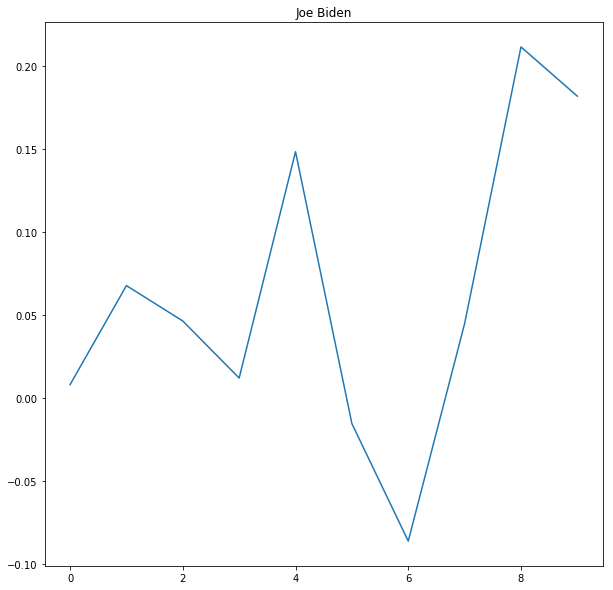

In [25]:
# Show the plot for one comedian
plt.plot(polarity_transcript[0])  
plt.title(data['full_name'].index[1])
plt.show()

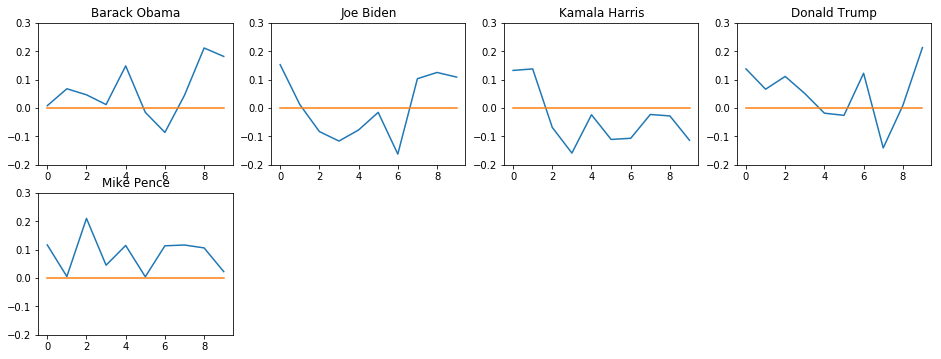

In [26]:
# Show the plot for all comedians
plt.rcParams['figure.figsize'] = [16, 12]

for index, comedian in enumerate(data.index):    
    plt.subplot(4, 4, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,10), np.zeros(10))
    plt.title(data['full_name'][index])
    plt.ylim(ymin=-.2, ymax=.3)
    
plt.show()